In [32]:
#import libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
#Load the dataset
df = pd.read_csv('Assessment exercise dataset - orders.csv')
df

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0
...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7


In [34]:
# RFM Analysis. We exclude the Recency because we have a limited period of time (January 2022)
users = df.groupby('user_id').agg({'order_id': 'count', 
                                    'amount': 'sum'})
users.rename(columns={'order_id': 'Frequency', 
                     'amount': 'MonetaryValue'}, inplace=True)

users

,Frequency,MonetaryValue
user_id,,
44118921,1,33.3
108938802,3,44.2
110361993,11,137.0
138437670,1,5.5
144777339,14,60.8
...,...,...
685557444369,1,6.8
685561325799,1,8.7
685561843323,1,7.2


In [35]:
# After calculating RFM values, we need to prepare the data for k-means clustering. 
#This involves transforming the data into a format suitable for k-means clustering, such as scaling the data to have mean 0 and standard deviation 1.
scaler = StandardScaler()
users_scaled = scaler.fit_transform(users)
users_scaled

array([[-0.62120269, -0.09666034],
       [-0.25376947,  0.16418778],
       [ 1.21596344,  2.3849864 ],
       ...,
       [-0.62120269, -0.72125995],
       [-0.62120269, -0.61835656],
       [-0.62120269, -0.72604615]])

In [36]:
#transform array to DataFrame
users_scaled = pd.DataFrame(users_scaled, columns = ['Frequency', 'MonetaryValue'])
users_scaled

,Frequency,MonetaryValue
0,-0.621203,-0.096660
1,-0.253769,0.164188
2,1.215963,2.384986
3,-0.621203,-0.761943
4,1.767113,0.561443
...,...,...
121938,-0.621203,-0.730832
121939,-0.621203,-0.685363
121940,-0.621203,-0.721260
121941,-0.621203,-0.618357


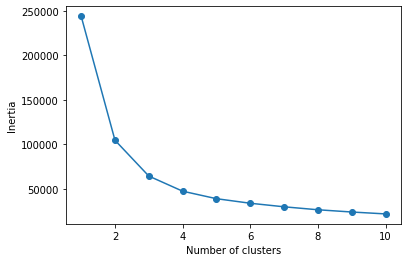

In [37]:
# Elbow Method-- determine the optimal number of clusters for k-means clustering.
inertia = []
for k in range(1, 11):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, random_state=1)
    kmeans.fit(users_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [38]:
#Create K-means
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)
#fit k-means algorithm to data
kmeans.fit(users_scaled)
#view cluster assignments for each observation
users_scaled['Cluster'] = kmeans.labels_

In [39]:
# Interpretation
users_scaled.reset_index().groupby(['Cluster']).agg({'Frequency': 'mean', 
                              'MonetaryValue': 'mean'}).round(1)

,Frequency,MonetaryValue
Cluster,,
0,0.8,0.9
1,-0.4,-0.4
2,3.6,3.4


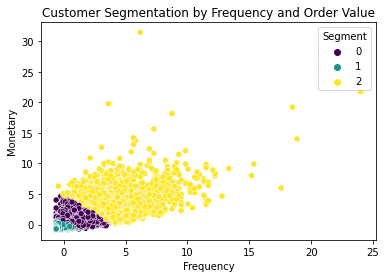

In [40]:
sns.scatterplot(data=users_scaled, x='Frequency', y='MonetaryValue', hue='Cluster', palette='viridis')
# add labels to the plot
plt.title('Customer Segmentation by Frequency and Order Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

# add a legend to the plot
plt.legend(title='Segment')

plt.show()

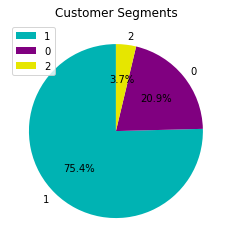

In [42]:
segment_counts = users_scaled['Cluster'].value_counts()
# Create a list of colors for the pie chart
colors = ['#00b3b3', '#800080', '#e6e600' ]

# Create a pie chart
plt.pie(segment_counts, labels=segment_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Customer Segments')

# Add a legend to the chart
plt.legend(loc="best", labels=segment_counts.index)

# Display the chart
plt.show()

In [44]:
#count members of each cluster
users_scaled['Cluster'].value_counts()

1    91957
0    25433
2     4553
Name: Cluster, dtype: int64